In [20]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# define image size and batch
IMG_SIZE = 224
BATCH_SIZE = 32

In [30]:
#Define Data Generators for train ,validation and test sets
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    r"C:\Users\pn817\Downloads\Telegram Desktop\Weather Prediction\Train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    r"C:\Users\pn817\Downloads\Telegram Desktop\Weather Prediction\Train",
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)
classes = list(train_generator.class_indices)


# Get class names from class_indices dictionary
class_names = list(class_indices.keys())

# Print class indices and names for verification
print("Class indices:", class_indices)
print("Class names:", class_names)

Found 2933 images belonging to 6 classes.
Found 731 images belonging to 6 classes.
Class indices: {'dew': 0, 'fogsmog': 1, 'hail': 2, 'lightning': 3, 'rain': 4, 'snow': 5}
Class names: ['dew', 'fogsmog', 'hail', 'lightning', 'rain', 'snow']


In [31]:
model = keras.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax') #output layer
])

In [32]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
model.fit(train_generator,validation_data=val_generator,epochs=10)

Epoch 1/10


C:\Users\pn817\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


92/92 ━━━━━━━━━━━━━━━━━━━━ 128s 1s/step - accuracy: 0.4823 - loss: 0.3939 - val_accuracy: 0.6813 - val_loss: 0.2464
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.7731 - loss: 0.1903 - val_accuracy: 0.7442 - val_loss: 0.2146
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 97s 1s/step - accuracy: 0.8121 - loss: 0.1618 - val_accuracy: 0.7921 - val_loss: 0.1945
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 98s 1s/step - accuracy: 0.8909 - loss: 0.1061 - val_accuracy: 0.7907 - val_loss: 0.2207
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 90s 969ms/step - accuracy: 0.9307 - loss: 0.0786 - val_accuracy: 0.7784 - val_loss: 0.2238
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 904ms/step - accuracy: 0.9605 - loss: 0.0468 - val_accuracy: 0.8085 - val_loss: 0.2441
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 905ms/step - accuracy: 0.9717 - loss: 0.0334 - val_accuracy: 0.7934 - val_loss: 0.2887
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 84s 900ms/step - accuracy: 0.9877 - loss: 0.0193 - val_accuracy: 0.7907 - val_los

In [25]:
model.save("WTMODEL.h5")

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

#load the save model
model = load_model(r"C:\Users\pn817\WTMODEL.h5")
print("model loaded")

model loaded


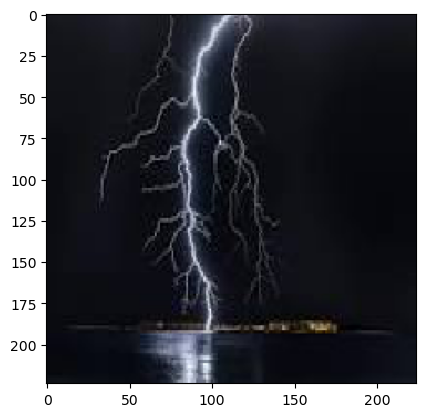

In [44]:
from matplotlib import pyplot as plt

test_image_path = r"C:\Users\pn817\Downloads\lightning.jpeg"
img = image.load_img(test_image_path, target_size=(224, 224))

plt.imshow(img)
plt.axis()
plt.show()

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255. #Normalize the pixel values


In [45]:
# Example code assuming 'classes' is defined

# Make predictions
prediction = model.predict(img_array)

# Get the index of the highest probability
v = np.argmax(prediction[0])

# Print the index and corresponding class label
print(v)  # Print the index (optional)
print(classes[v])  # Print the corresponding class label


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
3
lightning
